<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Polyomial_Regression%2C_Bias_Variance%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

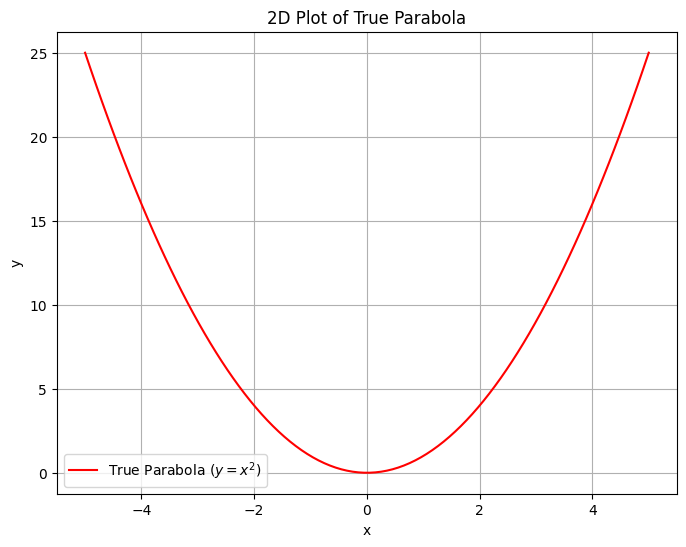

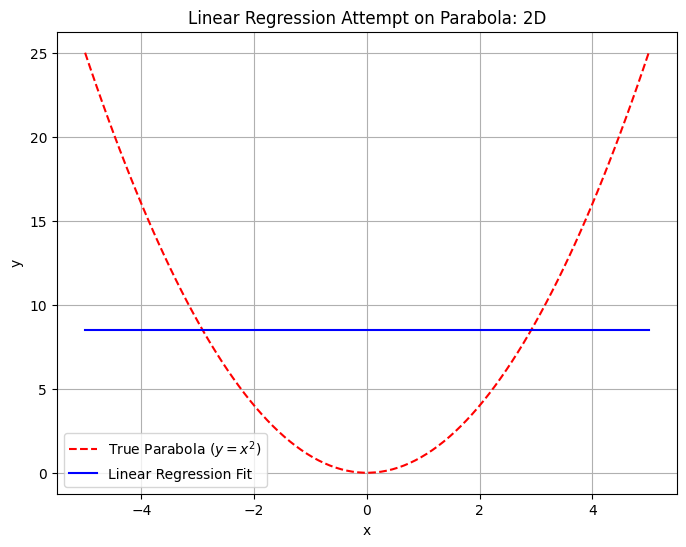

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate data for a parabola: y = x^2
x = np.linspace(-5, 5, 100)
y = x**2

# let's plot the inherent non-linear relationship in 2D.
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True Parabola ($y = x^2$)', color='red')
plt.title('2D Plot of True Parabola')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# --- 2D Plot: Linear Regression Fit ---
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True Parabola ($y = x^2$)', color='red', linestyle='--')

# Fit a simple linear regression model in 2D (y = mx + c)
# Reshape x to be a 2D array as required by scikit-learn
X_2d = x.reshape(-1, 1)
linear_model_2d = LinearRegression()
linear_model_2d.fit(X_2d, y)

# Predict y values using the 2D linear model
y_pred_2d = linear_model_2d.predict(X_2d)

plt.plot(x, y_pred_2d, label='Linear Regression Fit', color='blue')
plt.title('Linear Regression Attempt on Parabola: 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


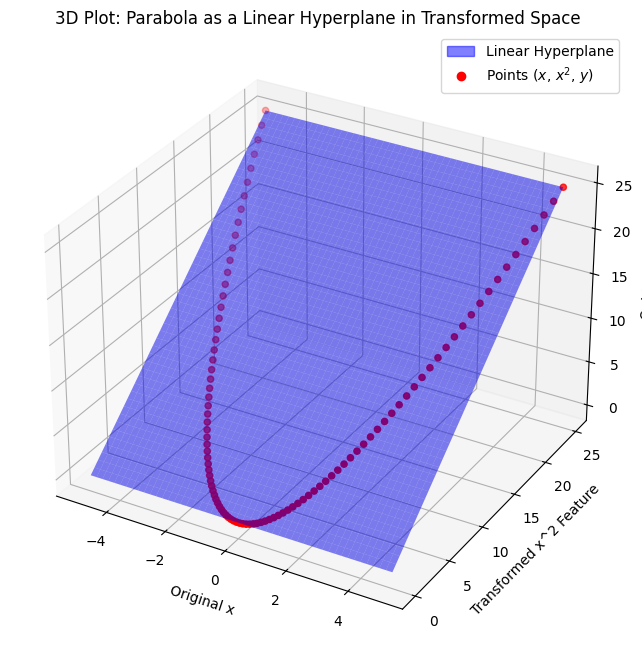

In [5]:
x_original_3d = x
x_squared_feature_3d = x**2
y_output_3d = y # y is the same as x**2 here


# 3D Plot: Parabola as a Linear Plan
# This plot visualizes how polynomial regression transforms the problem
# into a linear one in a higher-dimensional feature space.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points (x, x^2, y) in 3D space.
# These points form a curve that lies on the linear plane.
ax.scatter(x_original_3d, x_squared_feature_3d, y_output_3d,
           c='r', marker='o', label='Points ($x$, $x^2$, $y$)')


# Create a linear regression model to fit the plane in this 3D feature space.
# The inputs to this model are (x, x^2) and the output is y.
# This represents the equation y = beta_0 + beta_1*x + beta_2*x^2
# In our specific case y = x^2, so beta_0=0, beta_1=0, beta_2=1
X_transformed_features = np.column_stack((x_original_3d, x_squared_feature_3d))
linear_model_3d = LinearRegression()
linear_model_3d.fit(X_transformed_features, y_output_3d)

# Create a meshgrid to plot the linear plane that the points lie on.
# We need ranges for both the 'x' axis and the 'x^2' axis for the plane.
x_plane_grid = np.linspace(min(x_original_3d), max(x_original_3d), 50)
x_squared_plane_grid = np.linspace(min(x_squared_feature_3d), max(x_squared_feature_3d), 50)
X_plane_mesh, Y_plane_mesh = np.meshgrid(x_plane_grid, x_squared_plane_grid)

# Predict the (y-output) for the plane using the fitted 3D linear model.
# This generates the surface of the linear hyperplane.
Y_plane_surface = linear_model_3d.predict(
    np.column_stack((X_plane_mesh.ravel(), Y_plane_mesh.ravel()))
).reshape(X_plane_mesh.shape)

# Plot the linear plane
ax.plot_surface(X_plane_mesh, Y_plane_mesh, Y_plane_surface,
                alpha=0.5, color='blue', label='Linear Hyperplane ($y = \beta_0 + \beta_1 x + \beta_2 x^2$)')

# Set axis labels and title for clarity in the 3D transformed space
ax.set_xlabel('Original x')
ax.set_ylabel('Transformed x^2 Feature')
ax.set_zlabel('Output y')
ax.set_title('3D Plot: Parabola as a Linear Hyperplane in Transformed Space')

# Create a dummy legend entry for the surface plot as plot_surface doesn't support 'label' directly
# This is a common workaround for 3D plot legends
from matplotlib.patches import Patch
dummy_patch = Patch(color='blue', alpha=0.5, label='Linear Hyperplane')
ax.legend(handles=[dummy_patch, plt.Line2D([0], [0], linestyle="none", c='red', marker='o', label='Points ($x$, $x^2$, $y$)')])

plt.show()

### Implementation of Polynomial regression

In [19]:
import numpy as np


np.random.seed(1)
X = np.random.rand(50,1)

y = 5*(X**5) - 2.1*(X**4) + 2.7*(X**3) + 3.5*(X**2) + 0.3* X + 0.4*np.random.rand(50,1)
X

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04],
       [3.02332573e-01],
       [1.46755891e-01],
       [9.23385948e-02],
       [1.86260211e-01],
       [3.45560727e-01],
       [3.96767474e-01],
       [5.38816734e-01],
       [4.19194514e-01],
       [6.85219500e-01],
       [2.04452250e-01],
       [8.78117436e-01],
       [2.73875932e-02],
       [6.70467510e-01],
       [4.17304802e-01],
       [5.58689828e-01],
       [1.40386939e-01],
       [1.98101489e-01],
       [8.00744569e-01],
       [9.68261576e-01],
       [3.13424178e-01],
       [6.92322616e-01],
       [8.76389152e-01],
       [8.94606664e-01],
       [8.50442114e-02],
       [3.90547832e-02],
       [1.69830420e-01],
       [8.78142503e-01],
       [9.83468338e-02],
       [4.21107625e-01],
       [9.57889530e-01],
       [5.33165285e-01],
       [6.91877114e-01],
       [3.15515631e-01],
       [6.86500928e-01],
       [8.34625672e-01],
       [1.82882773e-02],
       [7.50144315e-01],


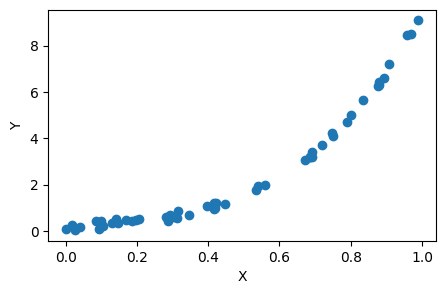

In [20]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [21]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [23]:
X.shape

(50, 1)

In [24]:
model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)
y_hat

array([[ 2.07850479],
       [ 4.47858369],
       [-1.22054893],
       [ 1.17094981],
       [-0.06015223],
       [-0.4907646 ],
       [ 0.25245149],
       [ 1.51302079],
       [ 1.9182276 ],
       [ 3.04228508],
       [ 2.09569619],
       [ 4.20079252],
       [ 0.39640787],
       [ 5.72722333],
       [-1.00473179],
       [ 4.08405777],
       [ 2.08074261],
       [ 3.19954391],
       [-0.11055072],
       [ 0.34615333],
       [ 5.11496002],
       [ 6.44054767],
       [ 1.25871937],
       [ 4.25700055],
       [ 5.71354716],
       [ 5.85770511],
       [-0.54848617],
       [-0.91240753],
       [ 0.12244004],
       [ 5.72742169],
       [-0.44322049],
       [ 2.11083493],
       [ 6.35847209],
       [ 2.9975643 ],
       [ 4.25347523],
       [ 1.27526936],
       [ 4.21093265],
       [ 5.38306636],
       [-1.07673606],
       [ 4.71455249],
       [ 6.60355476],
       [ 4.69889504],
       [ 0.99774213],
       [ 5.02423382],
       [-0.40461085],
       [ 2

In [25]:
print('Adj. R-square:', adj_r(r2_score(y,y_hat),X,y ) )
# LR model of degree: 1

Adj. R-square: 0.8603455785536848


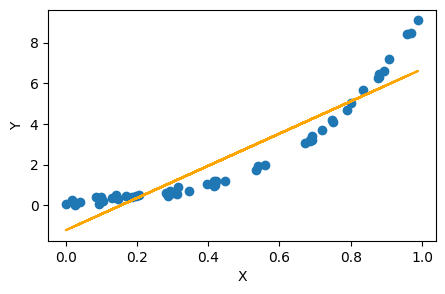

In [27]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, y_hat, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Adj. R-square: 0.8603455785536848


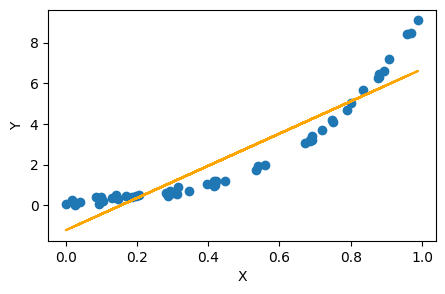

In [29]:
# let's add a degree 2 x
X_deg2 = np.hstack([X, X**2])
X_deg2.shape




Adj. R-square: 0.9908621668235834


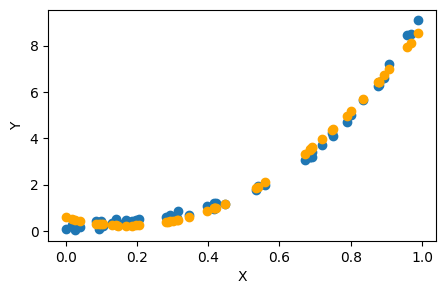

In [31]:
model = LinearRegression()
model.fit(X_deg2, y)

y_hat = model.predict(X_deg2)

print('Adj. R-square:', adj_r(r2_score(y,y_hat),X,y ) )
# LR model of degree: 1
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, y_hat, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Adj. R-square for Model Degree1: 0.8573742078846143
R-square for Model Degree1: 0.863195668787283


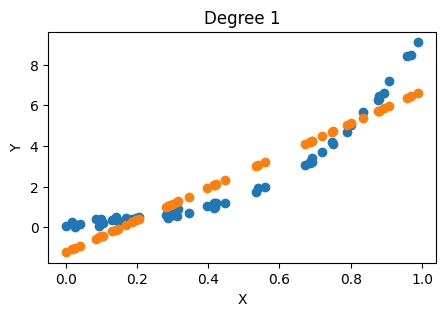

Adj. R-square for Model Degree2: 0.9904648697289566
R-square for Model Degree2: 0.9910486532149388


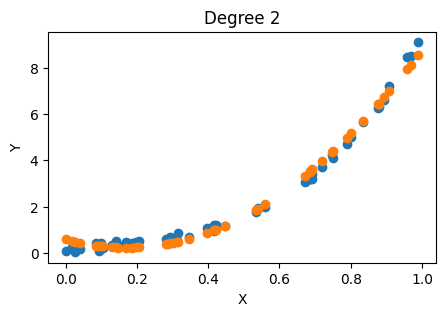

Adj. R-square for Model Degree3: 0.9983698293940293
R-square for Model Degree3: 0.9985029045455371


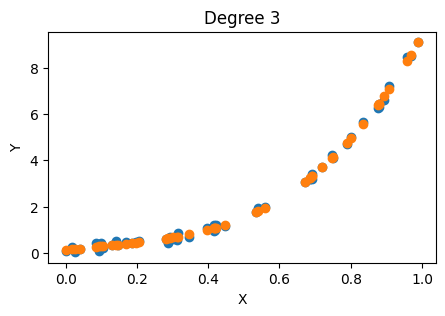

Adj. R-square for Model Degree4: 0.9983329285555469
R-square for Model Degree4: 0.9985030378866135


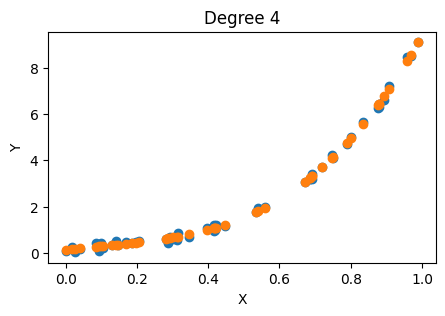

Adj. R-square for Model Degree5: 0.9983367967657876
R-square for Model Degree5: 0.9985404543046708


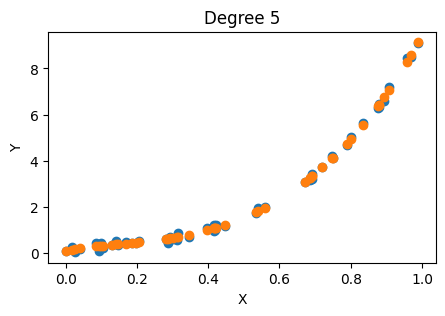

Adj. R-square for Model Degree6: 0.9983034922523684
R-square for Model Degree6: 0.99854585050203


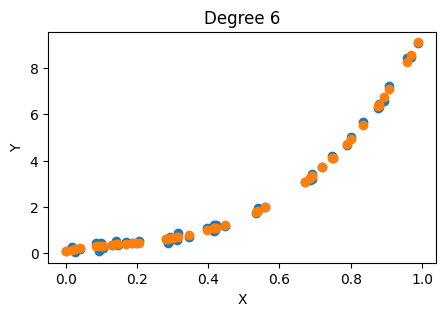

Adj. R-square for Model Degree7: 0.9982700127806299
R-square for Model Degree7: 0.9985524596735883


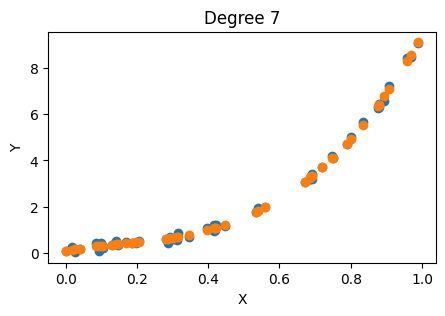

Adj. R-square for Model Degree8: 0.9982483735286771
R-square for Model Degree8: 0.9985701008397364


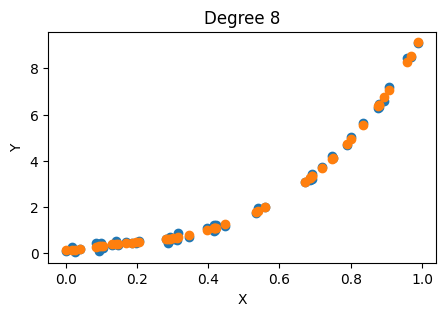

Adj. R-square for Model Degree9: 0.9982266413304147
R-square for Model Degree9: 0.9985885512629832


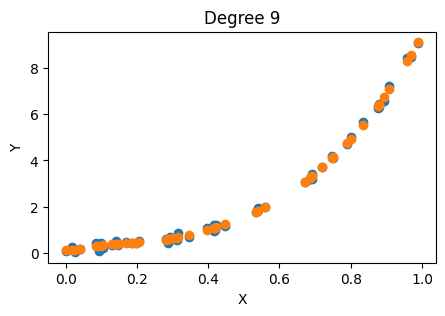

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


# let's start with degree 1 to 10
for degree in range(1, 10):
    #creates polynomial feature
    poly = PolynomialFeatures(degree)# explodes the feature_counts
    X_poly = poly.fit_transform(X)



    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'Adj. R-square for Model Degree{degree}: {adj_r(r2_score(y,output),X_poly_scaled,y )}' )
    print(f'R-square for Model Degree{degree}: {r2_score(y,output)}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {degree}")
    plt.show()

### Overfitting vs Underfitting

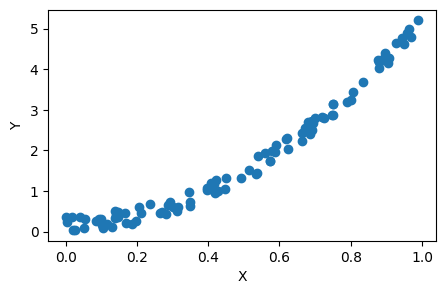

In [35]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 10 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    # score train set
    train_score = polyreg_scaled.score(X_train, y_train)
    train_scores.append(adj_r(train_score,X_train,y_train))

    # score
    test_score = polyreg_scaled.score(X_test, y_test)
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

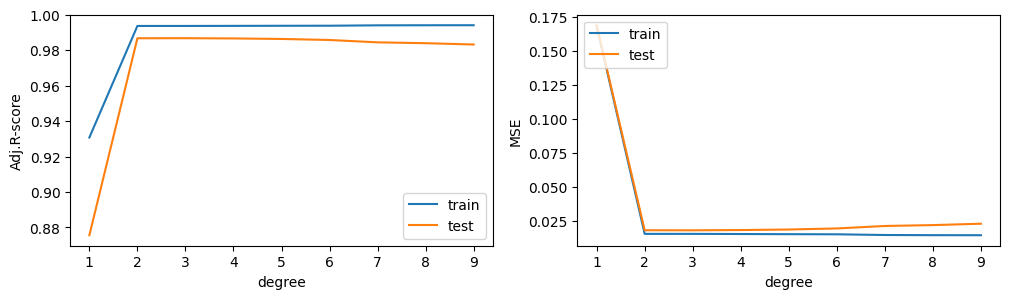

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 10)), train_scores, label="train")
axes[0].plot(list(range(1, 10)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 10)), train_loss, label="train")
axes[1].plot(list(range(1, 10)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()